In [2]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# packages to use
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import time
import scipy.stats as stats

## Mini Project 2

### Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics
In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.

Here, I will investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some possible ways I could go about exploring include:

1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.

2) Test if removing extremal return data creates a distribution with evidence of being normal.

3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.

4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.

5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

### Are log daily returns on stocks normally distributed?
To test this, I'll start with a simple '1st order' approach.

Let's import data from VOO (a large market index) and calculate its log daily returns. Then, with this array, I can plot a histogram. Since the appearance of the histogram depends on the number of bins, I'll plot the histogram 3 times with different bins spacings and fit a normal distribution to the data.

I'll also plot a Q-Q plot for visualization of whether or not the data is normally distributed. A Q-Q plot compares the quantiles of your data to the quantiles of a normal distribution; if the points lie approximately along the y=x line, it suggests the data is normally distributed.

Finally, I'll test the data with the Shapiro-Wilk Test which is a standard statistics test that tests for normality. Under this test, the null hypothesis H0 assumes that the data comes from a normal distribution. The alternative hypothesis H1 assumes that the data does not come from a normal distribution. If the p-value is less than 0.05, you reject the null hypothesis which implies that the data is not normal.

In [4]:
#load data for VOO
ticker = 'VOO'
start_date = dt.datetime.today()-dt.timedelta(days = 5*365)
end_date = dt.datetime.today()
stock = yf.download(ticker, start = start_date, end =end_date, auto_adjust = True)

[*********************100%***********************]  1 of 1 completed


In [5]:
#get log of daily returns for VOO and drop empty entries
VOO_close = stock['Close']['VOO']
VOO_daily_log_returns = np.log(VOO_close/VOO_close.shift(1))
VOO_daily_log_returns = VOO_daily_log_returns.dropna()

In [6]:
data = np.array(VOO_daily_log_returns)

# Fit a normal distribution
mu, sigma = stats.norm.fit(data)
print(f"Fitted Normal Distribution: mean = {mu:.4f}, std dev = {sigma:.4f}")
x = np.linspace(min(data), max(data), 100)
pdf = stats.norm.pdf(x, mu, sigma)

Fitted Normal Distribution: mean = 0.0006, std dev = 0.0109


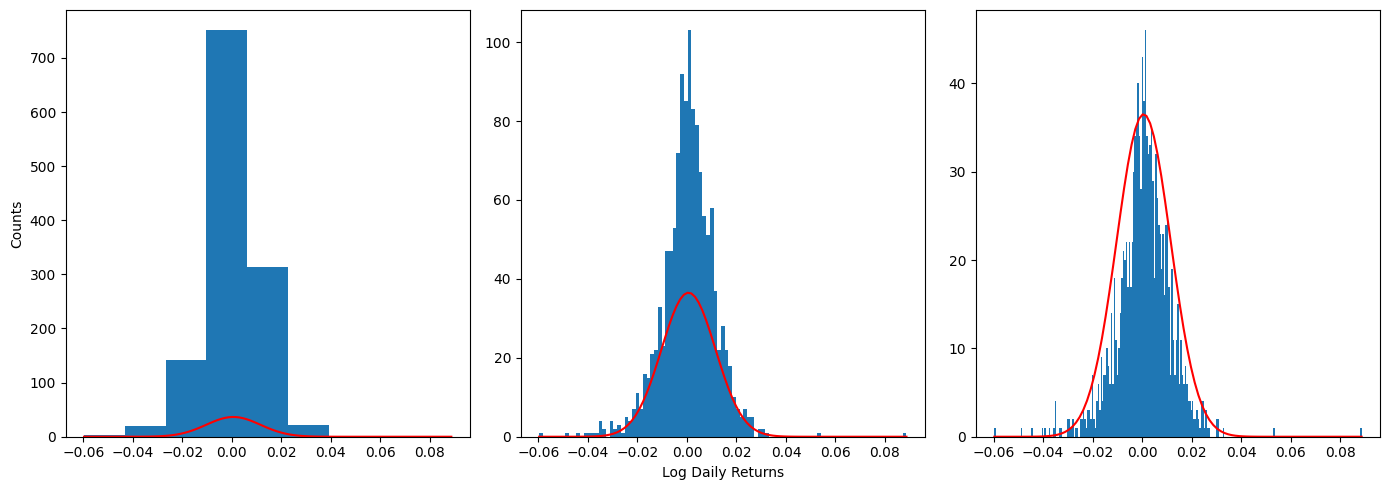

In [7]:
#plot histograms of the log daily returns... appears to be normally distributed
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

bins = np.linspace( min(data), max(data), num=10 )
axes[0].hist(data, bins = bins)
axes[0].plot(x, pdf, 'r-')
axes[0].set_ylabel('Counts')

bins = np.linspace( min(data), max(data), num=100 )
axes[1].hist(data, bins = bins)
axes[1].plot(x, pdf, 'r-')
axes[1].set_xlabel('Log Daily Returns')

bins = np.linspace( min(data), max(data), num=250 )
axes[2].hist(data, bins = bins)
axes[2].plot(x, pdf, 'r-')

plt.tight_layout()
plt.show()

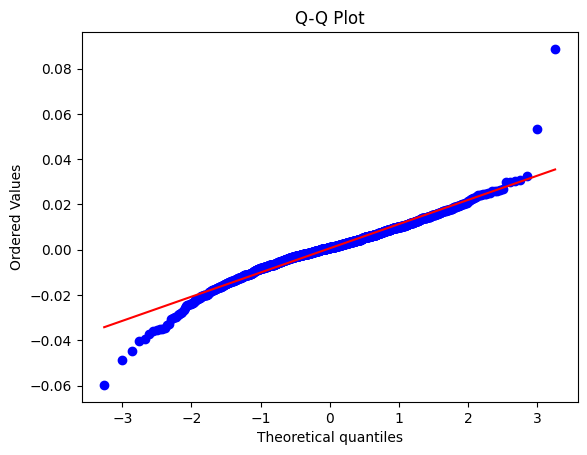

In [8]:
# Q-Q plot... if the data lies on the y=x line, then it's normal
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [9]:
stat, p = stats.shapiro(data)
print(f"Shapiro-Wilk test: stat = {stat:.4f}, p = {p:.4f}")

if p < 0.05:
    print("Reject H0: Data is not normally distributed")
else:
    print("Fail to reject H0: Data may be normally distributed")

Shapiro-Wilk test: stat = 0.9537, p = 0.0000
Reject H0: Data is not normally distributed


Looking at the histograms above, the data looks to eye to be approximately normally distributed. However, after further inspection and plotting the QQ plot, we can see that the extremes of the data are outliers. Moreover, there appears to be systematic deviation from the red line in the QQ plot around the x=0 point. Finally, using the shapiro-wilks test, we return an extremly low p-values and, therefore, we say that the data is NOT normally distributed.

Therefore, before any trimming / altering the data, we can say that this large market index VOO is NOT normally distributed. Although the histograms above look normal and although the QQ plot above looks straight (with exception to the extremes and small deviations around x=0), the data still failed the Shapiro-Wilk test and is therefore not normally distributed.

But, let's try this for an array of different stocks and see if we can find any stocks that are normally distributed...

In [12]:
tickers = [
    # Tech
    'AAPL', 'MSFT', 'GOOGL', 'NVDA', 'META', 'AVGO', 'ORCL',

    # Consumer
    'AMZN', 'WMT', 'COST', 'MCD', 'DIS',

    # Healthcare
    'JNJ', 'PFE', 'ABBV', 'LLY', 'MRK',

    # Financials
    'JPM', 'GS', 'BLK', 'BRK-B', 'V',

    # Energy & Industrials
    'XOM', 'CVX', 'COP', 'CAT', 'GE',

    # Index ETFs
    'SPY', 'DIA', 'QQQ', 'VTI'
]

In [10]:
normality_results = {} #create dictionary of normality results for all the tickers above
start_date = dt.datetime.today()-dt.timedelta(days = 5*365)
end_date = dt.datetime.today()

for ticker in tickers:
    try:
        stock = yf.download(ticker, start = start_date, end =end_date, auto_adjust = True)
        if stock.empty:
            print(f"Warning: No data for {ticker}")
        time.sleep(1) #I find that with this delay yf does not crash as much
    except Exception as e:
        print(f"Failed to download {ticker}: {e}")

    stock_close = stock['Close']
    stock_daily_log_returns = np.log(stock_close/stock_close.shift(1)).dropna()

    stat, p = stats.shapiro( stock_daily_log_returns ) #compute stats test for normality for each stock
    normality_results[ticker] = 'normal' if p >= 0.05 else 'not normal'

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [11]:
normal_tickers = [ticker for ticker, result in normality_results.items() if result == 'normal']
not_normal_tickers = [ticker for ticker, result in normality_results.items() if result == 'not normal']

# Print results... which are normal and which are not
print("Normally Distributed:")
print(normal_tickers)

print()
print("Not Normally Distributed:")
print(not_normal_tickers)

# Compute percentage
total = len(normality_results)
percent_normal = (len(normal_tickers) / total) * 100

print()
print(f"Percent of tickers with normally distributed log returns: {percent_normal:.2f}%")

Normally Distributed:
[]

Not Normally Distributed:
['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'META', 'AVGO', 'ORCL', 'AMZN', 'WMT', 'COST', 'MCD', 'DIS', 'JNJ', 'PFE', 'ABBV', 'LLY', 'MRK', 'JPM', 'GS', 'BLK', 'BRK-B', 'V', 'XOM', 'CVX', 'COP', 'CAT', 'GE', 'SPY', 'DIA', 'QQQ', 'VTI']

Percent of tickers with normally distributed log returns: 0.00%


### No, daily returns are NOT normally distributed

So, the answer appears to be no: the log of a stock's daily returns are NOT normally distributed...

However, how does this change if we trim the data? Look at the Q-Q plot from above; there are extreme cases of big losses and big gains that do not follow the y=x line. If we trim this data, then are the stocks normally distributed?

In [10]:
def trim_outliers(data, z_thresh=2.5):
    """
    Remove data points that are more than z_thresh standard deviations from the mean.
    
    Parameters:
        data (np.array): Input data array.
        z_thresh (float): Z-score threshold for outlier removal.
        
    Returns:
        trimmed_data (np.array): Data with outliers removed.
    """
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    trimmed_data = data[np.abs(z_scores) <= z_thresh]
    return trimmed_data

Shapiro-Wilk test: stat = 0.9696, p = 0.0000
Reject H0: Data is not normally distributed


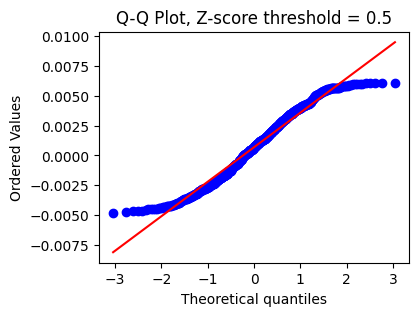

Shapiro-Wilk test: stat = 0.9907, p = 0.0000
Reject H0: Data is not normally distributed


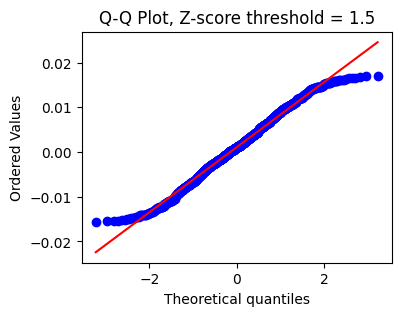

Shapiro-Wilk test: stat = 0.9957, p = 0.0015
Reject H0: Data is not normally distributed


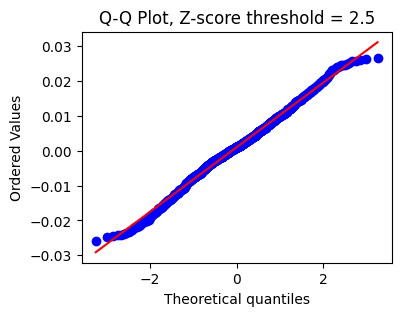

Shapiro-Wilk test: stat = 0.9861, p = 0.0000
Reject H0: Data is not normally distributed


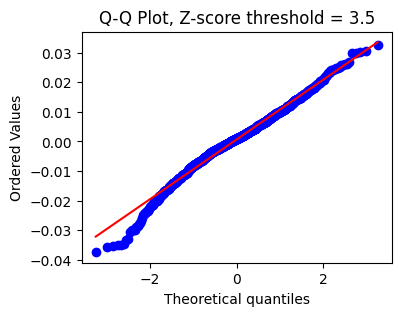

Shapiro-Wilk test: stat = 0.9537, p = 0.0000
Reject H0: Data is not normally distributed


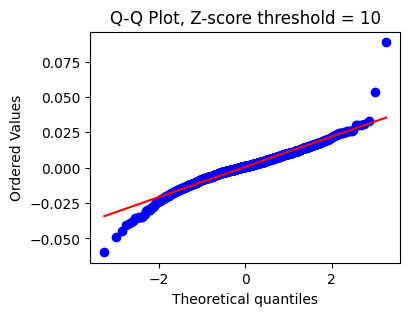

In [12]:
# Q-Q plot... if the data lies on the y=x line, then it's normal
# let's do the QQ plot for different values of the Z-score threshold to see if that changes anything
thresh_values = [0.5, 1.5, 2.5, 3.5, 10]

for i in thresh_values:
    trim_data = trim_outliers(data, z_thresh=i) #data refers to VOO from above
    
    stat, p = stats.shapiro(trim_data)
    print(f"Shapiro-Wilk test: stat = {stat:.4f}, p = {p:.4f}")
    if p < 0.05:
        print("Reject H0: Data is not normally distributed")
    else:
        print("Fail to reject H0: Data may be normally distributed")
    
    plt.figure(figsize=(4, 3))
    stats.probplot(trim_data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot, Z-score threshold = {i}")
    plt.show()

### Even after trimming, the answer appears to be no
So, at least for this data VOO, the answer still appears to be no idenpendent of how we trim the data. If you look closely at the data, there appears to be systematic disagreement with the y=x line.

For small positive returns (just above x=0), the data (in blue) appears to be slightly below the red line. And for small negative returns (just below x=0), the data (in blue) is systematically above the red line. Therefore, this systematic deviation could be what is causing the Shapiro-Wilk test to fail.

### Are individual stocks normally distributed after trimming?
This result from above is for a large market index, however. Maybe this answer is different for individual stocks. Let's import a bunch of stock data and check if individual stocks are normally distributed after trimming the outliers...

In [13]:
normality_results = {}
start_date = dt.datetime.today()-dt.timedelta(days = 5*365)
end_date = dt.datetime.today()

for ticker in tickers:
    try:
        stock = yf.download(ticker, start = start_date, end =end_date, auto_adjust = True)
        if stock.empty:
            print(f"Warning: No data for {ticker}")
        time.sleep(1)
    except Exception as e:
        print(f"Failed to download {ticker}: {e}")
        
    stock_close = stock['Close']
    stock_daily_log_returns = np.log(stock_close/stock_close.shift(1)).dropna()
    stock_daily_log_returns = trim_outliers( np.array(stock_daily_log_returns) )
    
    stat, p = stats.shapiro( stock_daily_log_returns )
    normality_results[ticker] = {
    'result': 'normal' if p >= 0.05 else 'not normal',
    'p_value': p
}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [14]:
normal_tickers = [ticker for ticker, result in normality_results.items() if result['result'] == 'normal']
not_normal_tickers = [ticker for ticker, result in normality_results.items() if result['result'] == 'not normal']

# Print results
print("Normally Distributed:")
print(normal_tickers)

print()
print("Not Normally Distributed:")
print(not_normal_tickers)

# Compute percentage
total = len(normality_results)
percent_normal = (len(normal_tickers) / total) * 100

print()
print(f"Percent of tickers with normally distributed log returns: {percent_normal:.2f}%")

Normally Distributed:
['AMZN', 'JNJ', 'GS', 'BRK-B']

Not Normally Distributed:
['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'META', 'AVGO', 'ORCL', 'WMT', 'COST', 'MCD', 'DIS', 'PFE', 'ABBV', 'LLY', 'MRK', 'JPM', 'BLK', 'V', 'XOM', 'CVX', 'COP', 'CAT', 'GE', 'SPY', 'DIA', 'QQQ', 'VTI']

Percent of tickers with normally distributed log returns: 12.90%


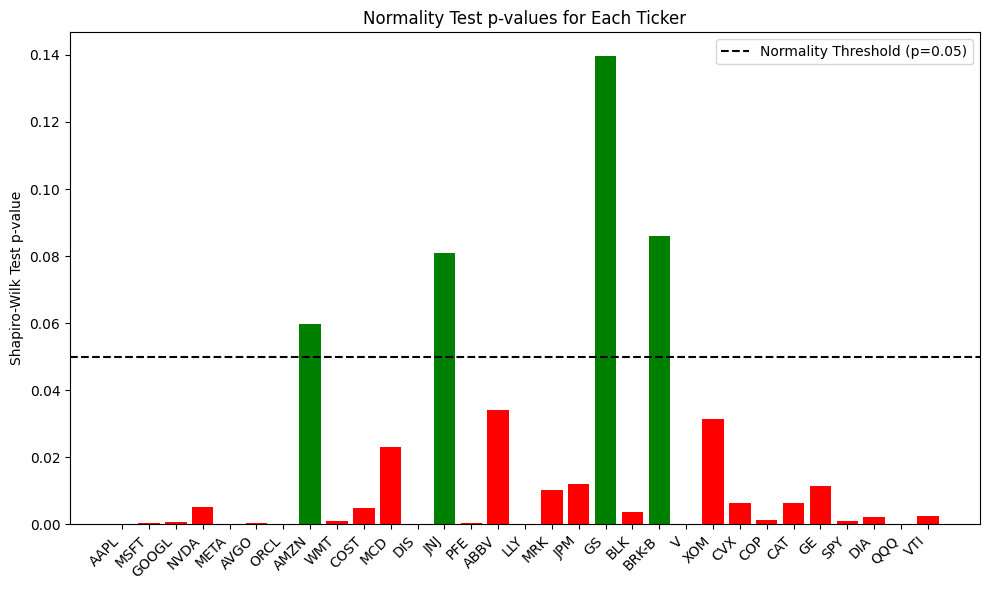

In [15]:
tickers_list = list(normality_results.keys())
p_values = [normality_results[t]['p_value'] for t in tickers_list]

plt.figure(figsize=(10, 6))
bars = plt.bar(tickers_list, p_values, color=['green' if normality_results[t]['result'] == 'normal' else 'red' for t in tickers_list])

plt.axhline(y=0.05, color='k', linestyle='--', label='Normality Threshold (p=0.05)')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Shapiro-Wilk Test p-value')
plt.title('Normality Test p-values for Each Ticker')
plt.legend()
plt.tight_layout()
plt.show()

### So, even after trimming the extremes, most stocks are not normally distributed. There are some exceptions, however. AMZN, JNJ, GS, and BRK-B appear to be normally distributed once trimmed.

Let's visualize Amazon, since that appears to be a normally distributed stock.

In [16]:
stock = yf.download('AMZN', start = start_date, end =end_date, auto_adjust = True)
stock_close = stock['Close']
stock_daily_log_returns = np.log(stock_close/stock_close.shift(1)).dropna()
stock_daily_log_returns = trim_outliers( np.array(stock_daily_log_returns) )

[*********************100%***********************]  1 of 1 completed


In [17]:
# Fit a normal distribution
mu, sigma = stats.norm.fit(stock_daily_log_returns)
print(f"Fitted Normal Distribution: mean = {mu:.4f}, std dev = {sigma:.4f}")
x = np.linspace(min(stock_daily_log_returns), max(stock_daily_log_returns), 100)
pdf = stats.norm.pdf(x, mu, sigma)

Fitted Normal Distribution: mean = 0.0005, std dev = 0.0188


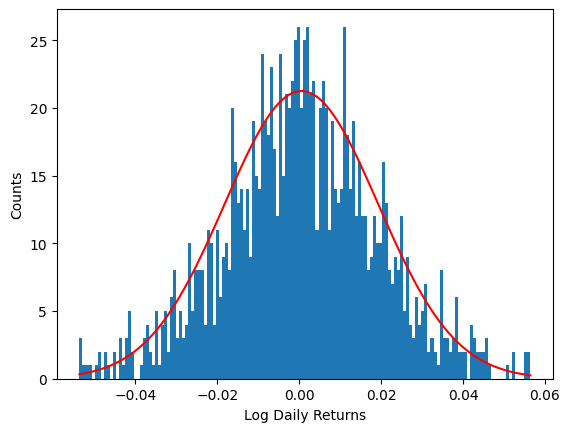

In [18]:
#plot histograms of the log daily returns... appears to be normally distributed

bins = np.linspace( min(stock_daily_log_returns), max(stock_daily_log_returns), num=150 )
plt.hist(stock_daily_log_returns, bins = bins)
plt.plot(x, pdf, 'r-')
plt.ylabel('Counts')
plt.xlabel('Log Daily Returns')
plt.show()

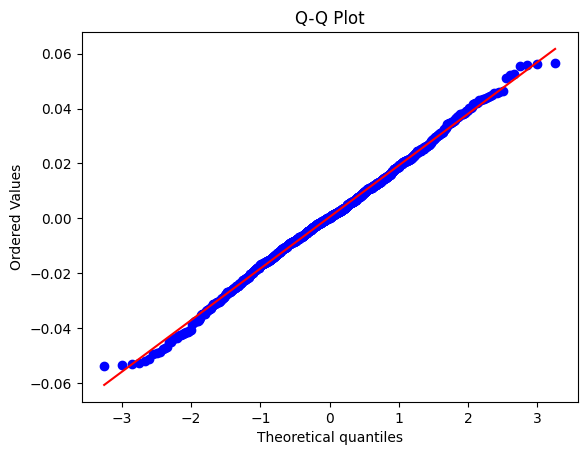

In [19]:
# Q-Q plot... if the data lies on the y=x line, then it's normal
stats.probplot(stock_daily_log_returns, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

### Generally, no the daily returns of stocks are not normally distributed. However, like AMZN, there are some exceptions after trimming the extreme values.